<a href="https://colab.research.google.com/github/amontoy6/Entrega-Notebooks-Lab-2-y-3/blob/main/AMM_lab2_nltk_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# Ana Maria Montoya
# Universidad EAFIT 
# 2023-1
#

In [ ]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otraas

In [ ]:
!pip3 install nltk
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [ ]:
!ls 'gdrive/MyDrive/Maestria/st1800-231/datasets/gutenberg-es/'

48903-0.txt  58221-0.txt  pg45438.txt  pg47631.txt
57654-0.txt  pg2000.txt   pg47287.txt  pg62627.txt


In [ ]:
# directorios (path) de entrada y salida:
# 
path_in="gdrive/MyDrive/Maestria/st1800-231/datasets/gutenberg-es/"
path_out="gdrive/MyDrive/Maestria/st1800-231/out/"
filenametxt='pg2000.txt'
filenamecleantxt='pg2000_clean.txt'
filenamecsv='pg2000.csv'

In [ ]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# ejemplo de como nltk tokeniza (esta del Lab 1):
texto="texto libre que permite crear     hiso20091iras epor--4 no s#e preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

17
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor', '--', '4', 'no', 's', '#', 'e', 'preocupe', 'hola', 'mundo', 'cruel']


In [ ]:
# las demás instrucciones del lab1-nltk-local.ipynb

In [ ]:
# note la estrategia de tokenizar con sentencias simples de python, (es de phyton nativo funcion split)
# ¿ cual le parece mejor?
# y note la diferencia entre .split() y .split(' ')
texto="texto libre que permite crear     hiso20091iras            epor--4 no s#e preocupe \n hola mundo cruel"
tokens = texto.split()
print(len(tokens))
print(tokens)
tokens = texto.split(' ')
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor--4', 'no', 's#e', 'preocupe', 'hola', 'mundo', 'cruel']
29
['texto', 'libre', 'que', 'permite', 'crear', '', '', '', '', 'hiso20091iras', '', '', '', '', '', '', '', '', '', '', '', 'epor--4', 'no', 's#e', 'preocupe', '\n', 'hola', 'mundo', 'cruel']


In [ ]:
# stopwords en nltk (Ingles)
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{'because', 'further', 'hadn', 'during', 'ain', 'mightn', 'before', 'myself', 'yourselves', 'of', "isn't", 'there', 'own', 'what', 'his', 't', "shouldn't", 'for', 'you', 'into', 'where', 'other', 've', "that'll", 'himself', 'whom', 'd', 'we', 'are', 'only', 'after', "hasn't", 'herself', 'in', "didn't", 'do', 'if', "haven't", 'o', 'should', 'have', 'against', 'weren', 'not', 'below', 'an', "needn't", "she's", 'theirs', 'more', 'then', 'so', 'on', 'don', 'shan', 'some', 'being', "you've", 'those', 'ourselves', 'am', 're', 'didn', 'when', 'themselves', 'just', 'why', 'yours', 'once', 'all', "won't", 'nor', "hadn't", 'its', "should've", 'down', 'can', "you'll", 'it', 'a', 'her', 'but', 'this', 'their', 'they', 'as', 'our', 'is', "aren't", 'has', 'out', "couldn't", 'he', 'ma', 'that', 'isn', 'be', "mightn't", "wasn't", 'such', 'doesn', 'now', 'until', 'above', 'and', 'through', 'very', 'both', 'no', 'having', 'same', 'how', "wouldn't", 'aren', "shan't", 'most', 'i', 'doing', 'up', 'than

In [ ]:
# stopwords en nltk (Español)
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

313
{'otra', 'mí', 'también', 'le', 'estará', 'fueran', 'otros', 'uno', 'estén', 'hemos', 'fuésemos', 'hubimos', 'te', 'hubisteis', 'esos', 'tendrán', 'tuvieran', 'habrías', 'tuviese', 'ante', 'tuviésemos', 'habidos', 'estuvieras', 'nada', 'estuviera', 'tus', 'mías', 'él', 'habré', 'teniendo', 'éramos', 'tuvieses', 'tuviste', 'eran', 'a', 'hubieras', 'tenga', 'vuestra', 'estuvieran', 'seríais', 'hay', 'estaríamos', 'una', 'estuvierais', 'ni', 'hubieseis', 'yo', 'nuestra', 'estabas', 'tenidas', 'fuimos', 'habida', 'durante', 'tendréis', 'esas', 'estuviésemos', 'estuvieron', 'algo', 'vuestras', 'fuisteis', 'tuviéramos', 'mío', 'son', 'serás', 'esté', 'hubieron', 'habréis', 'hayáis', 'estados', 'tenida', 'muy', 'unos', 'estemos', 'es', 'serían', 'suya', 'tuvieron', 'tendría', 'estos', 'su', 'tú', 'habéis', 'siente', 'estuve', 'habido', 'algunos', 'habríamos', 'seríamos', 'eres', 'se', 'nosotras', 'hayamos', 'hubo', 'esto', 'estaba', 'hubiesen', 'hubiera', 'suyas', 'sentidos', 'estaríais',

In [ ]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en

x = len(voc_en.words())
print('tamaño del diccionario en inglés del nltk: ',x)

# verifica si una palabra pertenece al diccionario, en este caso house y pepito
w = "house"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")
    
w = "pepito"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")    

tamaño del diccionario en inglés del nltk:  236736
house  true
pepito  false


In [ ]:
# leer un archivo de ejemplo en .txt
input_file = open(path_in+filenametxt, "r", encoding='iso-8859-1')
filedata = input_file.read()

numero de palabras finales =  22840
[('don', 2652), ('quijote', 2180), ('sancho', 2148), ('ms', 2044), ('si', 1966), ('dijo', 1808), ('ser', 1293), ('tan', 1243), ('as', 1075), ('seor', 1063), ('respondi', 1063), ('bien', 1050), ('haba', 1034), ('merced', 900), ('pues', 865), ('qu', 849), ('sino', 694), ('dos', 684), ('caballero', 661), ('decir', 578)]


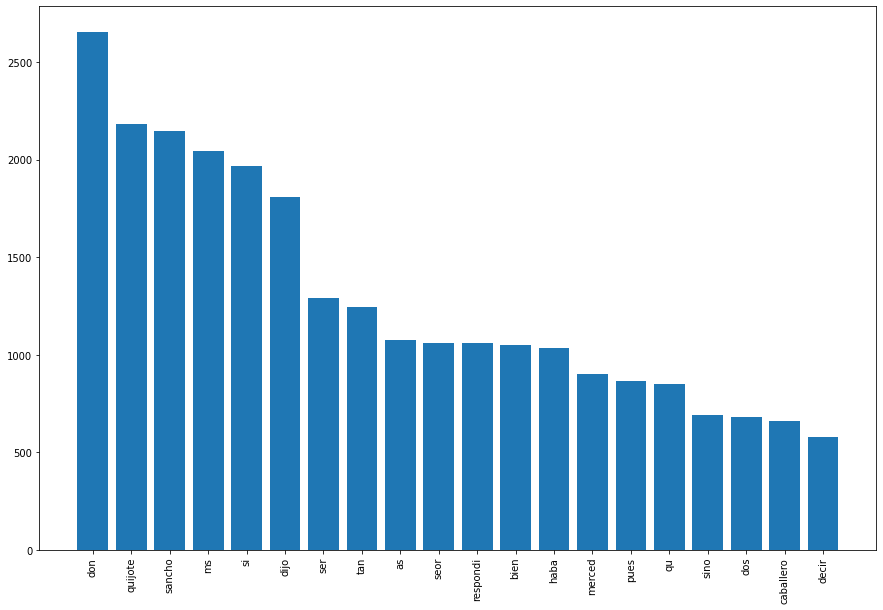

In [ ]:
# opción 1:
# TOKENIZAR con .split(), 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  17401


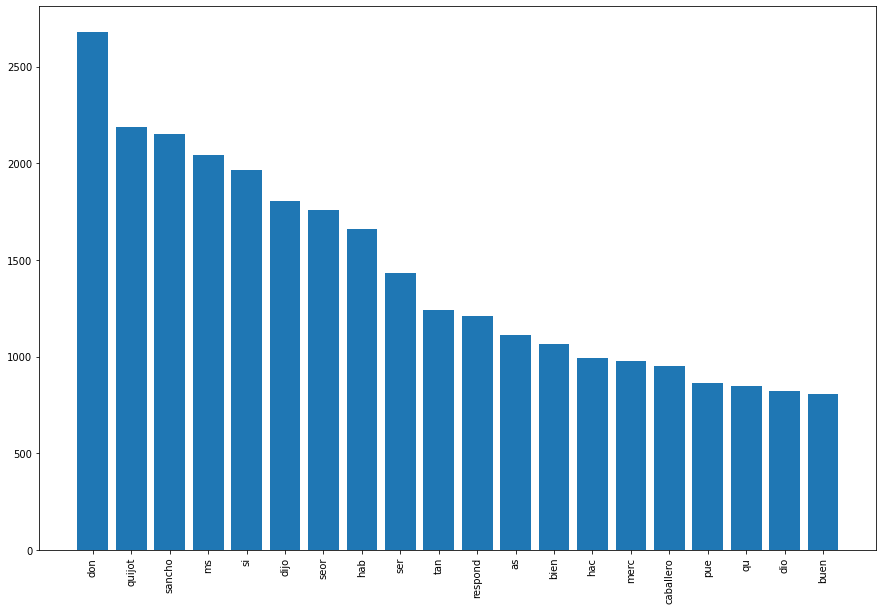

In [ ]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
# probar cada una de las siguientes opciones: porter y lancaster.
#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  17334


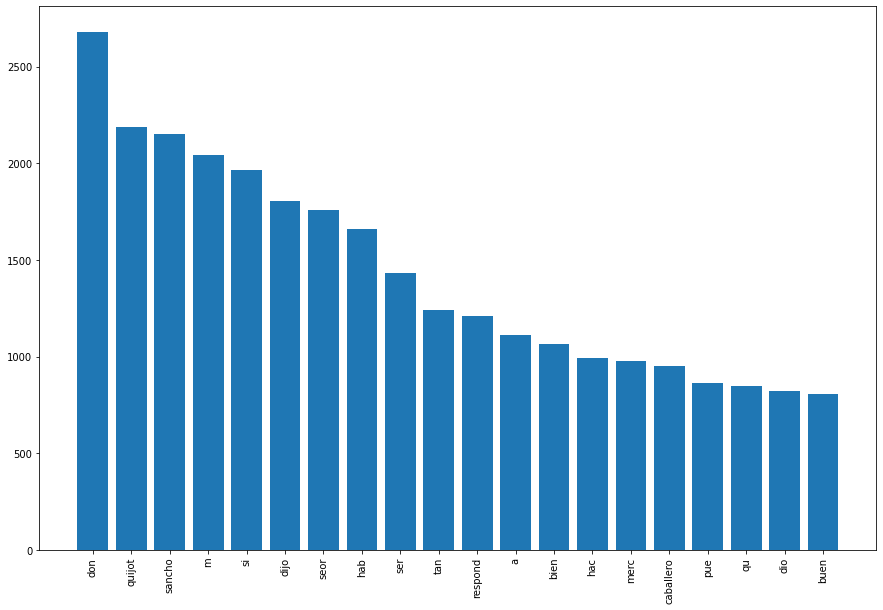

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones: 
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()